In [ ]:
import pandas as pd
df=pd.read_csv('/content/Customer_Data.csv')

In [ ]:
df.head(30)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [ ]:
df.shape

(8950, 18)

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

FILLING UP THE MISSING VALUES WITH THE MEAN


In [ ]:
df["MINIMUM_PAYMENTS"]=df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())


In [ ]:
df["CREDIT_LIMIT"]=df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

In [ ]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

THE CUSTOMER ID COLUMN IS OF NO USE TO US

In [ ]:
df=df.drop(columns=["CUST_ID"],axis=1)

In [ ]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.shape

(8950, 17)

We see that there is a disparity between the value ranges of different columns,hence we perform standard scaler to bring the data on a comparable scale

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scaled_df = scalar.fit_transform(df)


In [ ]:
scaled_df

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [ ]:
scaled_df=pd.DataFrame(data=scaled_df,columns=[df.columns])

In [ ]:
scaled_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.486217,-3.498541e-01,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.503396,-4.390474e-16,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960433,-0.570615,-3.354655e-01,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097856,-0.580536,-3.469065e-01,0.329200,-4.122768


AS ALL THE FEATURES ARE CONTINUOS,WE DO PCA TO BRING THE MULTIDIMENSINAL DATA TO 2 DIMENSIONS,SO THAT WE CAN VISUALIZE THE CLUSTERS BETTER IN 2D

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


,PCA1,PCA2
0,-1.682222,-1.076447
1,-1.138302,2.506492
2,0.969690,-0.383536
3,-0.873623,0.043149
4,-1.599436,-0.688571
...,...,...
8945,-0.359629,-2.016143
8946,-0.564368,-1.639124
8947,-0.926204,-1.810782
8948,-2.336556,-0.657952


In [ ]:
import matplotlib.pyplot as plt


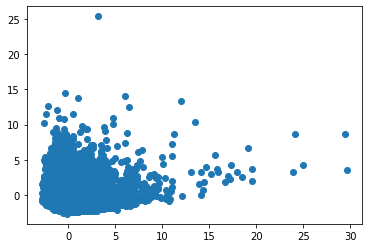

In [ ]:
plt.scatter(pca_df['PCA1'],pca_df['PCA2'])

FINDING K FOR K-MEANS WITH ELBOW METHOD

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

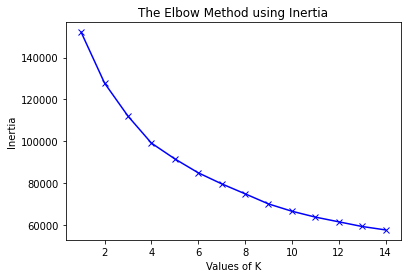

In [ ]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

FOR K=4 CLUSTERS


In [ ]:
kmeans_model=KMeans(4)
Y_predict=kmeans_model.fit_predict(scaled_df)
pca_df_kmeans=pd.concat(
    [pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
pca_df_kmeans

,PCA1,PCA2,cluster
0,-1.682220,-1.076451,3
1,-1.138295,2.506477,0
2,0.969685,-0.383513,2
3,-0.873627,0.043167,3
4,-1.599434,-0.688581,3
...,...,...,...
8945,-0.359629,-2.016146,2
8946,-0.564369,-1.639126,2
8947,-0.926203,-1.810787,2
8948,-2.336552,-0.657971,3


In [ ]:
pca_df_kmeans['cluster'].value_counts()

3    3966
2    3363
0    1211
1     410
Name: cluster, dtype: int64

In [ ]:
print(Y_predict)

[3 0 2 ... 2 3 3]


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(scaled_df, Y_predict)

0.1976193847865969

In [ ]:
import seaborn as sns

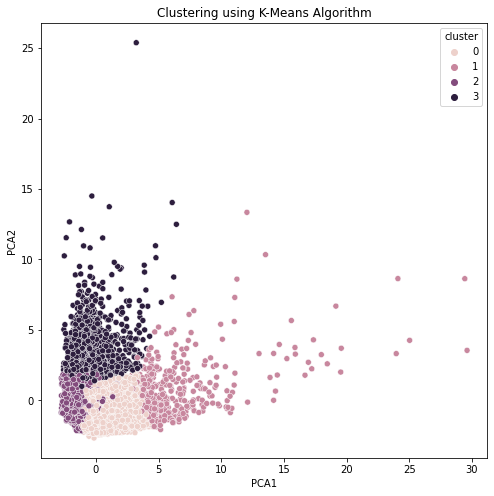

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans)
plt.title("Clustering using K-Means Algorithm")
plt.show()

FO K=5 CLUSETRS

In [ ]:
kmeans_model=KMeans(5)
Y_predict=kmeans_model.fit_predict(scaled_df)
pca_df_kmeans=pd.concat(
    [pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
pca_df_kmeans['cluster'].value_counts()

2    3933
3    2632
0    1196
1    1158
4      31
Name: cluster, dtype: int64

In [ ]:
silhouette_score(scaled_df, Y_predict)

0.188868549109466

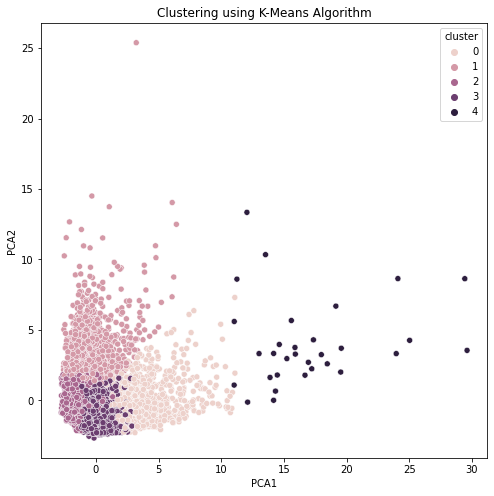

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans)
plt.title("Clustering using K-Means Algorithm")
plt.show()

FOR K=3

In [ ]:
kmeans_model=KMeans(3)
Y_predict=kmeans_model.fit_predict(scaled_df)
pca_df_kmeans=pd.concat(
    [pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
pca_df_kmeans['cluster'].value_counts()

0    6103
2    1595
1    1252
Name: cluster, dtype: int64

In [ ]:
silhouette_score(scaled_df, Y_predict)

0.25024795274747624

In [ ]:
kmeans_model

KMeans(n_clusters=3)

In [ ]:
import seaborn as sns

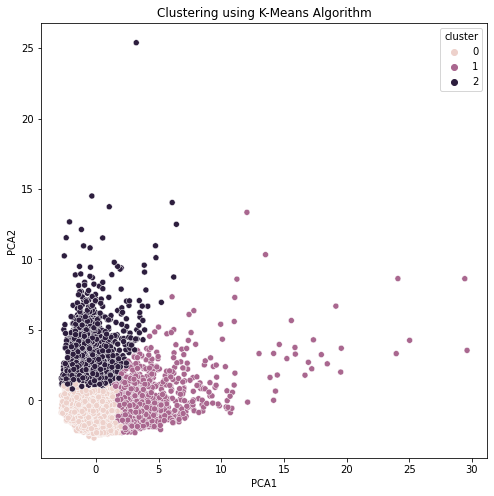

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans)
plt.title("Clustering using K-Means Algorithm")
plt.show()

APPLYING HIERARCHIAL CLUSTERING





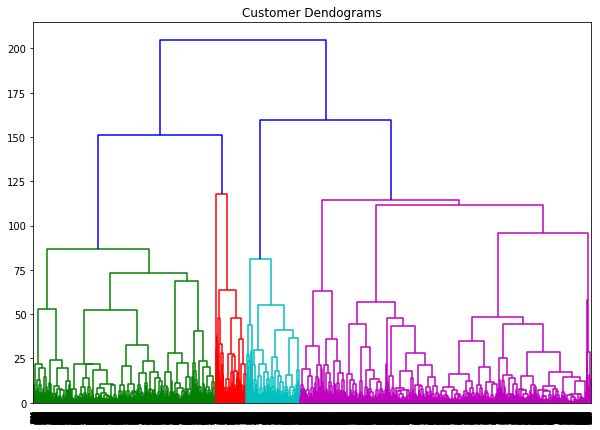

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(scaled_df, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels_=cluster.fit_predict(scaled_df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
labels_

array([1, 2, 0, ..., 1, 1, 1])

In [ ]:
silhouette_score(scaled_df, labels_)

0.1731098007232828

VISUALIZING FOR THREE DIFFERENT VALUES OF K=4,5,3,WE FIND OUT THAT K=3 GIVES US THE MOST CLEAR SEPERATION BETWEEN THE CLUSTERS(HIGHEST SILHOUTTE COEFFIECIENT),SO WE GO AHEAD WITH K=3 FOR K-MEANS CLUSTERING

In [ ]:
kmeans_model.cluster_centers_.shape

(3, 17)

In [ ]:
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
# inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,800.167868,0.834788,502.262838,250.387735,252.196794,330.119045,0.463653,0.130616,0.344946,0.068341,1.211898,8.590134,3266.448383,907.745931,548.656396,0.154850,11.478859
1,2197.296209,0.981438,4233.043267,2697.663874,1535.858626,455.603491,0.948701,0.669259,0.739333,0.062830,1.523163,56.112620,7687.659744,4118.077849,1214.668536,0.301078,11.916933
2,3990.232159,0.957980,384.777726,248.730163,136.125050,3869.733380,0.232865,0.110942,0.144869,0.447281,12.390351,5.628446,6684.526658,3018.006479,1795.728205,0.033774,11.350877


In [ ]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


NOW WE SEPERATE THE DATA POINTS INTO THE RESPECTIVE CLUSTERS THEY BELONG TO

In [ ]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==0]
cluster_1_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.00,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.00,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.00,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.00,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,0


In [ ]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
cluster_2_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,1
12,1516.928620,1.000000,3217.99,2500.23,717.76,0.000000,1.000000,0.250000,0.916667,0.000000,0,26,3000.0,608.263689,490.207013,0.250000,12,1
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,12,1
34,3517.101616,0.727273,547.28,0.00,547.28,0.000000,1.000000,0.000000,1.000000,0.000000,0,14,11000.0,8735.607835,17862.558310,0.000000,12,1
37,4047.480828,1.000000,2380.55,1642.17,738.38,1697.660901,0.750000,0.500000,0.750000,0.333333,7,41,5000.0,1617.894416,1541.141605,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8689,368.318662,0.909091,8053.95,8053.95,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0,46,2000.0,7966.582037,219.761189,0.777778,12,1
8698,873.680279,1.000000,2397.05,1072.46,1324.59,1657.160669,1.000000,0.500000,0.916667,0.583333,12,23,2500.0,2028.986135,297.682079,0.083333,12,1
8707,78.448912,1.000000,1875.18,977.85,897.33,0.000000,1.000000,0.833333,0.916667,0.000000,0,78,1200.0,1656.503571,172.161277,1.000000,12,1
8737,2533.618119,0.909091,5633.83,2985.92,2647.91,2451.807788,0.916667,0.500000,0.750000,0.333333,16,82,9000.0,8176.953944,602.963244,0.000000,12,1


In [ ]:
cluster_3_df = cluster_df[cluster_df["Cluster"]==2]
cluster_3_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,2
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,2
24,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.000000,11,2
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8869,2171.222526,1.000000,791.18,791.18,0.00,2056.602480,0.428571,0.428571,0.000000,0.571429,6,8,3000.0,300.088696,453.100425,0.000000,7,2
8914,181.891981,0.500000,0.00,0.00,0.00,1865.191764,0.000000,0.000000,0.000000,0.500000,10,0,2000.0,4565.356495,88.057892,1.000000,6,2
8915,381.341657,1.000000,78.00,0.00,78.00,934.808869,1.000000,0.000000,0.833333,0.666667,16,6,1000.0,143.118373,85.152441,0.000000,6,2
8917,1880.817982,1.000000,0.00,0.00,0.00,2335.949930,0.000000,0.000000,0.000000,0.333333,5,0,2500.0,221.568190,374.197621,0.000000,6,2


NOW WE TRY TO DRAW PLOTS TO EXAMINE HOW THE FEATURES OF THE ORIGINAL DATASET VARY ACROSS 3 DIFFERENT CLUSTERS,THIS WILL HELP US LATER IN DECIDING IN WHICH CLUSTER A CUSTOMER HAVING PARTICULAR CHARACTERISTICS MIGHT BELONG TO

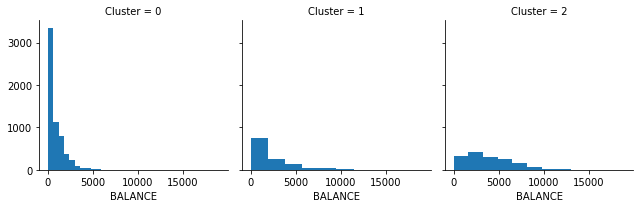

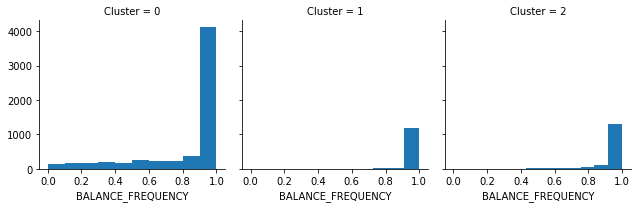

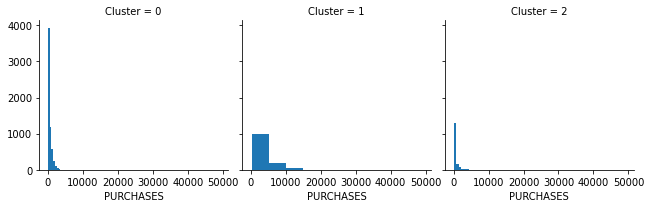

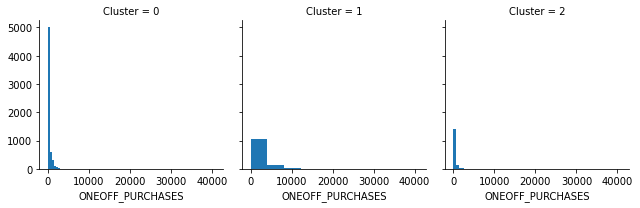

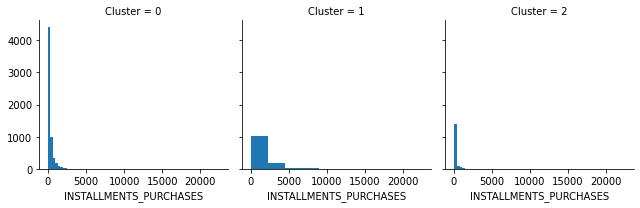

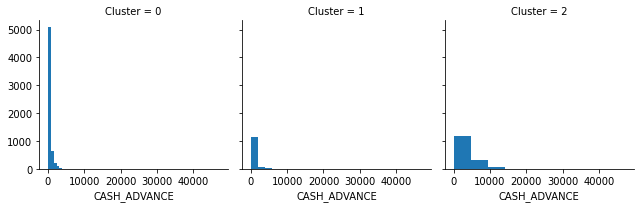

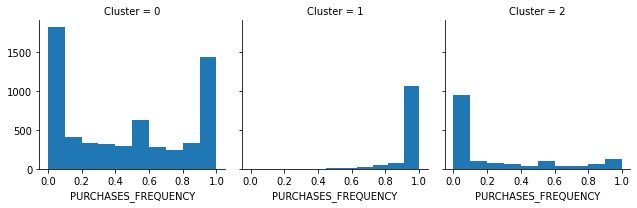

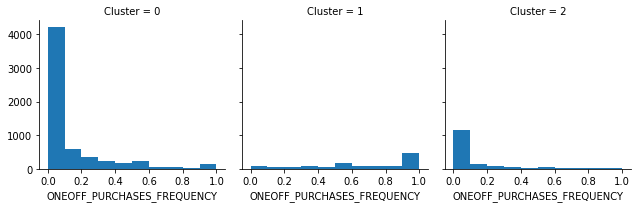

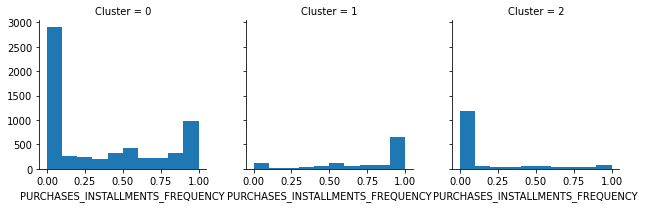

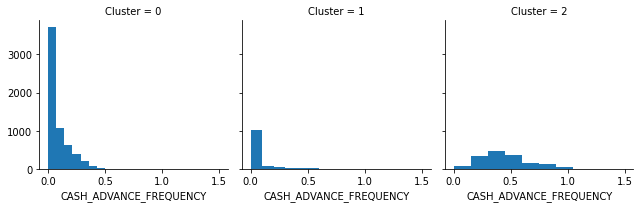

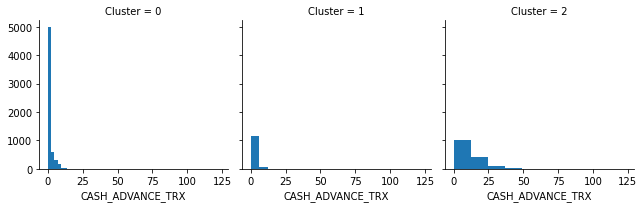

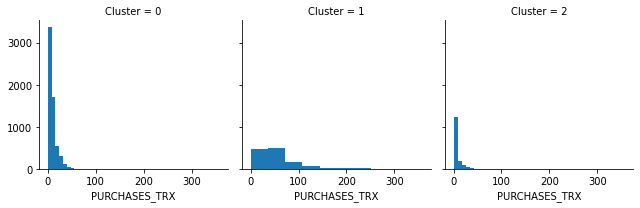

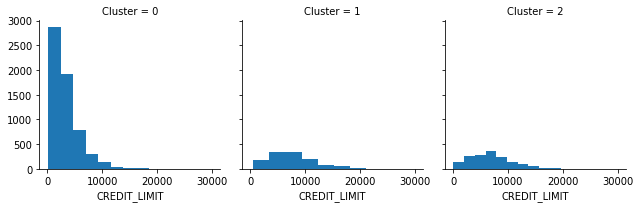

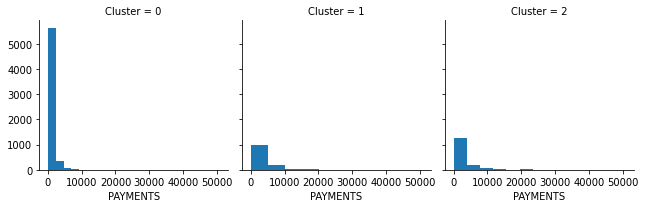

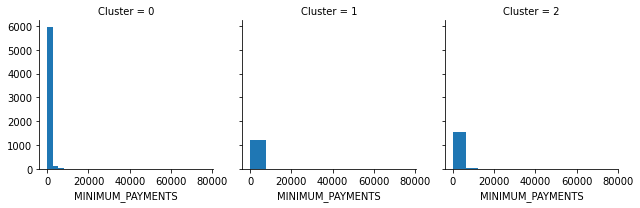

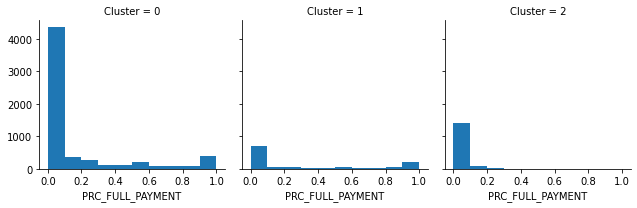

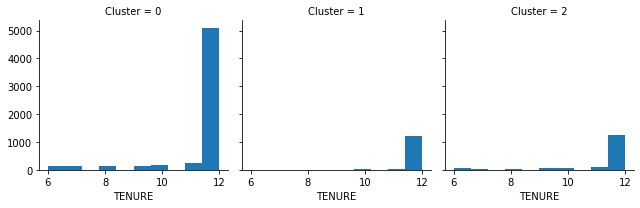

In [ ]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()

Saving the kmeans clustering model and the data with cluster label

In [ ]:
import joblib
joblib.dump(kmeans_model, "clustering_model_final.pkl")

['clustering_model_final.pkl']

In [ ]:
cluster_df.to_csv("NewClustered_Customer_Data.csv")